In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [5]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

# Assuming you upload a single CSV file, get its name
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    csv_filename = fn

# Read the uploaded CSV file into a pandas DataFrame
df = pd.read_csv(io.StringIO(uploaded[csv_filename].decode('utf-8')))

# Display the first 5 rows of the DataFrame
display(df.head())

Saving Car_sales.csv to Car_sales.csv
User uploaded file "Car_sales.csv" with length 16018 bytes


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [6]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [7]:
model_sales = df.groupby('Model')['Sales_in_thousands'].sum().sort_values(ascending=False)
model_sales


,Sales_in_thousands
Model,
F-Series,540.561
Explorer,276.747
Camry,247.994
Taurus,245.815
Accord,230.902
...,...
Carrera Coupe,1.280
Cutlass,1.112
CL500,0.954


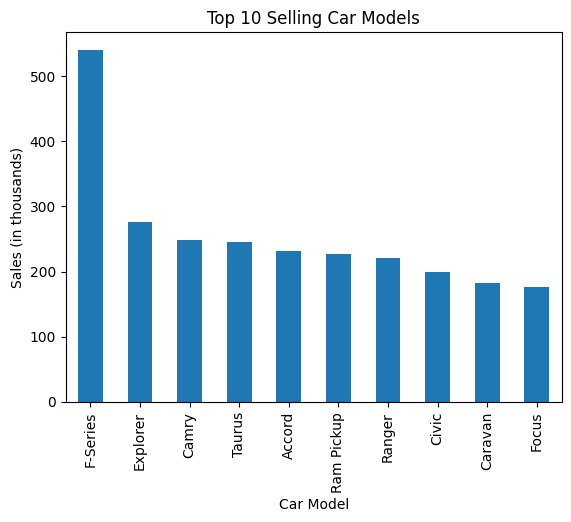

In [8]:
plt.figure()
model_sales.head(10).plot(kind='bar')
plt.title('Top 10 Selling Car Models')
plt.xlabel('Car Model')
plt.ylabel('Sales (in thousands)')
plt.show()


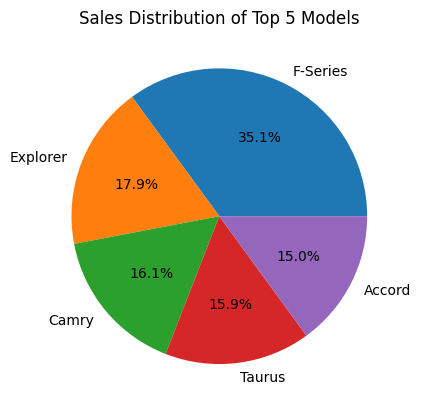

In [9]:
plt.figure()
model_sales.head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution of Top 5 Models')
plt.ylabel('')
plt.show()


In [12]:
top_models = model_sales.head(10).reset_index()

fig = px.bar(
    top_models,
    x='Model',
    y='Sales_in_thousands',
    title='Top 10 Selling Car Models'
)
fig.show()


In [13]:
fig = px.pie(
    top_models.head(5),
    names='Model',
    values='Sales_in_thousands',
    title='Sales Share of Top 5 Models'
)
fig.show()


Conclusion:

Bar charts identify top-selling car models.

Pie charts show how sales are distributed.

Interactive charts help better business decisions.

 Results can guide production and marketing strategy.